In [1]:
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import pandas as pd
import os

import sys
!{sys.executable} -m pip install SciencePlots

In [2]:
# Reads input text file
# Locate pop up behind browser window

# Select file
from tkinter import Tk
from tkinter.filedialog import askdirectory
directory = askdirectory(title='Select Folder') # shows dialog box and return the path
print(directory)  

# Enter file to read
# get filename from user
filename = input("Enter saved data file name (no extension needed): ")   
filename = filename + ".csv"

# Add dataset to dataframe
df = pd.read_csv(os.path.join(directory, filename), engine='python', skiprows=7)
df = df.drop(columns=['Loss Ch1(dB)', 'Loss Ch2(dB)', 'Ch2(V)'])
df.rename(columns = {list(df)[0]: 'Wavelength (nm)'}, inplace = True)
df.rename(columns = {list(df)[1]: 'Transmission'}, inplace = True)

#df = pd.read_csv(os.path.join(directory, filename))
print(df)

//weisslab-photon.vuds.vanderbilt.edu/semspace/Kellen/COVID Sensing on RR/2022.1_COVIDSENSOR/C211002-3/0 - primary reference
Enter saved data file name (no extension needed): WG03.0
        Wavelength (nm)  Transmission
0              1500.000        0.4281
1              1500.001        0.4339
2              1500.002        0.4395
3              1500.003        0.4446
4              1500.004        0.4488
...                 ...           ...
129996         1629.996        0.4919
129997         1629.997        0.4916
129998         1629.998        0.4912
129999         1629.999        0.4915
130000         1630.000        0.4914

[130001 rows x 2 columns]


In [3]:
# Enter measurement details
polarization = "TM"
waveguide = "Device 1, Reference Measurement"
power = "-10 dBm"
power_range = "268.3 nW"

This is the directory your file will be stored in: //weisslab-photon.vuds.vanderbilt.edu/semspace/Kellen/COVID Sensing on RR/2022.1_COVIDSENSOR/C211002-3/0 - primary reference
Enter name for output file (no extension needed): t
t.jpg


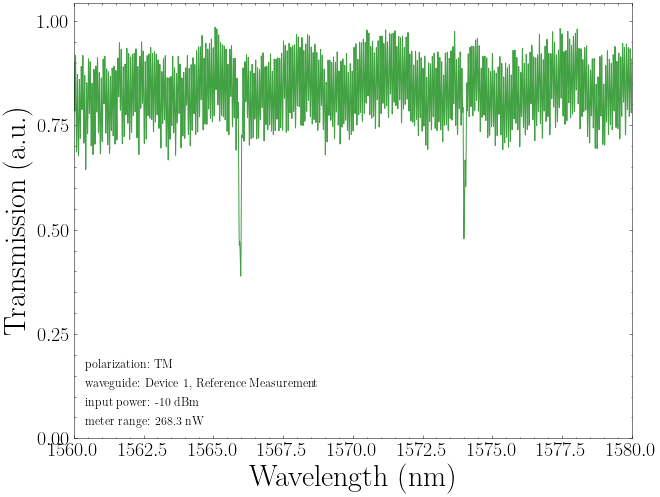

In [4]:
df_asarray_x = df['Wavelength (nm)'].values
df_asarray_y = df['Transmission'].values
zmax = np.max(df_asarray_y)
df_asarray_y = df_asarray_y/zmax

# matplotlib https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
from cycler import cycler

# github u/garrettj403 SciencePlots
# science, nature, no-latex... light, muted, retro, high-vis, grid, scatter
# run with 'default' style to reset figure. Otherwise some style specific params may not be changed
plt.style.use(['science','muted'])

# https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend
# https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text
plt.rcParams["figure.figsize"] = (10,8)
mat.rcParams['mathtext.default'] = 'regular'
from matplotlib import rc
rc('text', usetex=True)

#from __future__ import unicode literals
red = '#e31e1e'
green = '#42a143'

fig, ax = plt.subplots()  # Create a figure and an axes.
#ax.scatter(df_asarray_x, df_asarray_y, s=1, color = green)  # Plot some data on the axes.
ax.plot(df_asarray_x, df_asarray_y, color = green)  # Plot some data on the axes.
ax.set_xlim(left=1560, right=1580)
plt.xticks(fontsize = 20)
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], fontsize = 20)
ax.set_xlabel('Wavelength (nm)', fontsize=30, fontweight = '1000')
ax.set_ylabel('Transmission (a.u.)', fontsize=30, fontweight = '1000')

import matplotlib.patches as mpl_patches

handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", lw=0, alpha=0)] * 4

labels = []
labels.append(r'polarization: '+ polarization)
labels.append(r'waveguide: '+ waveguide)
labels.append(r'input power: '+ power)
labels.append(r'meter range: '+ power_range)
#labels.append(r'Sampling Total: '+ points)

# create the legend, supressing the blank space of the empty line symbol and the
# padding between symbol and label by setting handlelenght and handletextpad
ax.legend(handles, labels, loc='best', fontsize=12, 
          fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)

#ax.legend(fontsize = 20, bbox_to_anchor=(0.57, 0.3))
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

# X AXIS -BORDER
#ax.spines['bottom'].set_visible(False)
# BLUE
#ax.set_xticklabels([])
# RED
#ax.set_xticks([])
# RED AND BLUE TOGETHER
#ax.axes.get_xaxis().set_visible(False)

# Y AXIS -BORDER
#ax.spines['left'].set_visible(False)
# YELLOW
#ax.set_yticklabels([])
# GREEN
#ax.set_yticks([])
# YELLOW AND GREEN TOGHETHER
#ax.axes.get_yaxis().set_visible(False)

print("This is the directory your file will be stored in:", directory)

savedimagename = input("Enter name for output file (no extension needed): ")
savedimagename = savedimagename + ".jpg"
print(savedimagename)

plt.savefig(os.path.join(directory, savedimagename), dpi=300)
